In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## Nearest Neighbor

Similarity - look for the datapoints that are most similar to the observation we are trying to predict

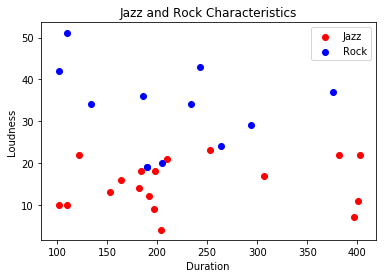

In [2]:
music = pd.DataFrame()

#add data
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

#it is known whether songs in training data are jazz or not
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

#visualize data
plt.scatter(music[music['jazz'] == 1].duration,
            music[music['jazz'] == 1].loudness,
            color='red')
plt.scatter(music[music['jazz'] == 0].duration,
            music[music['jazz'] == 0].loudness,
            color='blue')
plt.legend(['Jazz','Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

Use distance to find nearest observation, typically Euclidean distance (standard distance measure used in geometry)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness','duration']]
Y = music.jazz
neighbors.fit(X,Y)

#predict for a 190 second long song with 24 loudness
neighbors.predict([[24,190]])

array([0])

Model predicts that the song is not jazz

## K-Nearest Neighbors (KNN)

Looks at several of the nearest neighbors instead of just the single nearest datapoint

k = the number of neighbors to look at, each of the k neighbors gets to "vote" on the predicted outcome

__Advantages:__

- Smooths out predictions; if only one neighbor is predicting outcomes, model overfits to training data where outliers can create pockets of one category prediction surrounded by many datapoints of another category

- Gets implicit probabilities instead of only predicting classes; probability for class i is votes(i) / k

- Can accommodate many different classes, prediction takes the class for which probability fraction is maximized

In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness','duration']]
Y = music.jazz
neighbors.fit(X,Y)

#predict same song as before (24 loudness, 190 duration)
print(neighbors.predict([[24,190]]))
print(neighbors.predict_proba([[24,190]]))

[1]
[[0.4 0.6]]


Model now predicts song is jazz, with 2 votes for rock and 3 votes for jazz. Closest observation was rock, but there are more jazz neighbors than rock neighbors

__Mesh:__ visualize decision bounds, generates a prediction over the whole space

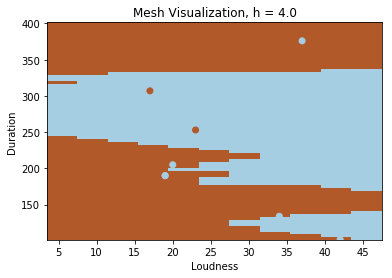

In [5]:
#convert from dataframes to arrays for the mesh
X = np.array(X)
Y = np.array(Y)

#mesh size
h = 4.0

#plot decision boundary, assign color to each point in the mesh
x_min = X[:,0].min() - .5
x_max = X[:, 0].max () + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

#put result in a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

#add training points to plot
plt.scatter(X[:,0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh Visualization, h = 4.0')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

- Any new point falling in the blue area would be predicted as jazz, brown area as rock.

- Visualization is not completely continuous; mesh size of 4 (h = 4.0) calculates the value for each point where points are spaced 4.0 away from each other. Smaller mesh size results in a more continuous visualization at the cost of system resources, higher mesh behaves opposite

__Drill:__ Set mesh size to 10, then reduce to what feels like a good compromise between continuous and computational demand.

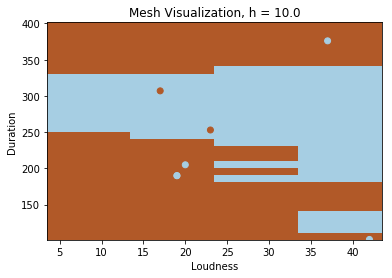

In [6]:
#mesh size
h = 10.0

#plot decision boundary, assign color to each point in the mesh
x_min = X[:,0].min() - .5
x_max = X[:, 0].max () + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

#put result in a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

#add training points to plot
plt.scatter(X[:,0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh Visualization, h = 10.0')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

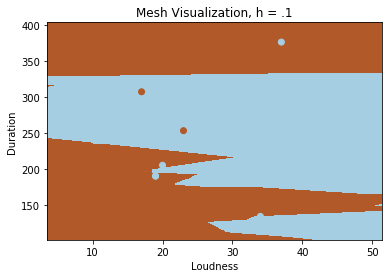

In [7]:
#mesh size
h = .1

#plot decision boundary, assign color to each point in the mesh
x_min = X[:,0].min() - .5
x_max = X[:, 0].max () + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

#put result in a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

#add training points to plot
plt.scatter(X[:,0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh Visualization, h = .1')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

__When do you get a visualization that looks acceptably continuous?__ looks continuous around h = 1

__When do you start to get a noticeable delay?__ noticeable delay at h = .1 (about 3 seconds to render)

## Challenge: Implement the Nearest Neighbor algorithm

Using the music dataset, build a nearest neighbor algorithm from scratch. Test against the SKLearn package

In [41]:
music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


In [9]:
#not sure why this returns type error

#import math
#
#def distance(duration, loudness):
#    distance_sq = 0
#    for i in range(len()):
#        distance_sq += (duration[i] - loudness[i])**2
#    return sqrt(distance_sq)

In [44]:
#redefine X and Y out of their arrays used in mesh
X = music[['loudness','duration']]
Y = music.jazz

#point we want to test
test = [[24,190]]

#write function to calculate distance
def euclidean_distance(test, X):
    '''
    Returns list of euclidean distances
    between test point and training data
    '''
    distance = []
    for i in range(len(test)): #loop test through data X
        distance.append(np.sqrt(np.sum(np.square(test[i] - X), axis=1))) #distance formula
    return distance

#print(euclidean_distance(test, X))

#write function to get k neighbors' votes

def neighbors_votes(X, test, k):
    '''
    Returns votes for shortest k euclidean distances
    '''
    distance_sort = np.argsort(euclidean_distance(test, X)) #sort distance indices ascending
    distance_k = [] #empty list to put index of closest k distance indices
    for n in range(k): #loop through sorted dist to get lowest k indices
        distance_k = distance_sort[:,:k] 
        for i in distance_k:
            votes = [] #empty list to put votes into
            votes.append(music['jazz'].iloc[i])
    return(votes)

#print(neighbors_votes(X, test, 5))

#write function to classify with knn

def knn_classifier(X, test, k):
    '''
    Returns classification based on mode of votes
    Mode array = classification
    count array = number of votes
    '''
    prediction = scipy.stats.mode(neighbors_votes(X, test, k), axis=None)
    return prediction

print(knn_classifier(X,test,5))

ModeResult(mode=array([1]), count=array([3]))
